In [1]:
from scipy.optimize import differential_evolution
import numpy as np
import json
import matplotlib.pyplot as plt
from observations import observations
from calibration import CALIBRATION
from models import MG_MODEL
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
%config Completer.use_jedi = False
showOriginalModelString = True
# load the samples from the original model
class GSs:
    graph_size = [5,5]
    colors = ['lime' , 'violet', 'yellowgreen', 'peru', 'skyblue']
    legend_font_size = 30
    tick_font_size = 30
    title_font_size = 30
#// read the inferred values and divide it to the given groups 
with open('inferred_params_model.json') as file:
    inferred_params_model = json.load(file)
# inferred_params_model['k301'] = .01
model = MG_MODEL()
calib_obj = CALIBRATION(model)

ID Mg_.08 sim 0.9999936689092546 exp 1.1
ID Mg_.8 sim 1.0 exp 1
ID Mg_8 sim 2.4979442412253507 exp 2.5
ID Mg_8 sim 126.4595886789482 exp 125


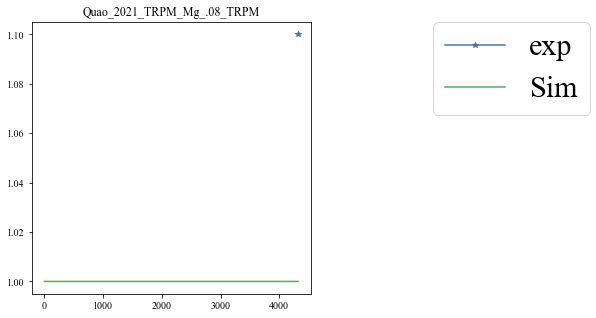

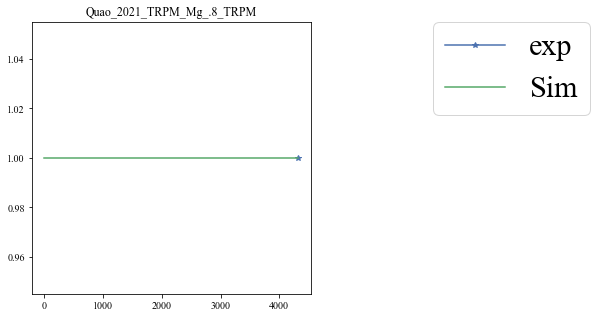

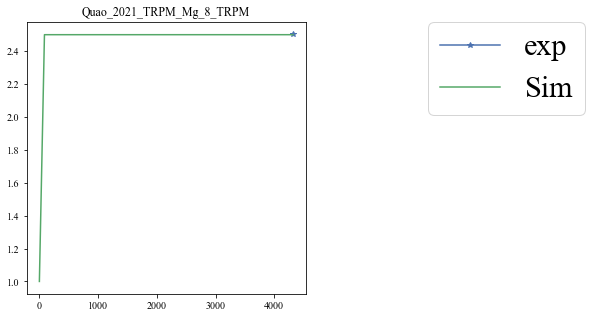

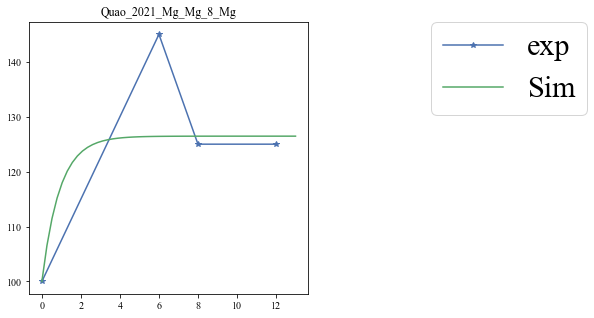

In [2]:
if True:
    #// plot the simulation vs observations
    for study in observations['studies']:
        study_observations = observations[study]
        measurement_scheme = study_observations['measurement_scheme']

        _, IDs_results = calib_obj.cost_function_study(study=study,free_params_model=inferred_params_model,
                                             select_sim = False)
    #     print(IDs_results)
        for ID, ID_results in IDs_results.items():
            ID_observations = study_observations[ID]['expectations']
    #         print(ID_observations)
            for key in ID_observations.keys():
                exp = ID_observations[key]['mean'] # the whole array
    #             print(key,ID_observations[key])
                sim = ID_results[key]
                print('ID {} sim {} exp {}'.format(ID,sim[-1],exp[-1]))

                fig = plt.figure(figsize=(GSs.graph_size[0],GSs.graph_size[1]))
                fig.canvas.draw()
                ax = fig.add_subplot(1, 1, 1)
                ax.plot([i for i in measurement_scheme[key]],exp,label='exp',marker='*')
                ax.plot(ID_results['time'],sim,label='Sim')
                ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=0.,prop={ 'family':'Times New Roman','size':GSs.legend_font_size},ncol=1)
                ax.set_title(study+'_'+ID+'_'+key)
            

133.61954990918093
133.6187039516851
333.77418521076186


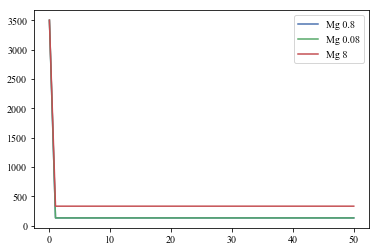

In [3]:
if True:
    model.reset(inferred_params_model) #reset the model
    ## apply the boundary condition
    model.set('Mg_e', .8)
    results = model.simulate(0,72*60,selections=['TIME','TRPM'])
    plt.plot(results['TRPM'],label='Mg 0.8')
    print(results['TRPM'][-1])

    model.reset(inferred_params_model) #reset the model
    ## apply the boundary condition
    model.set('Mg_e', .08)
    results = model.simulate(0,72*60,selections=['TIME','TRPM'])
    plt.plot(results['TRPM'],label='Mg 0.08')
    print(results['TRPM'][-1])

    model.reset(inferred_params_model) #reset the model
    ## apply the boundary condition
    model.set('Mg_e', 8)
    results = model.simulate(0,72*60,selections=['TIME','TRPM'])
    plt.plot(results['TRPM'],label='Mg 8')
    plt.legend()
    print(results['TRPM'][-1])

In [4]:
if False:
    model.reset(inferred_params_model) #reset the model
    ## apply the boundary condition
    model.set('Mg_e',8) 
    results = model.simulate(0,12,selections=['TIME','Mg','Mg_e'])
    plt.plot(results['Mg'])
    plt.legend()


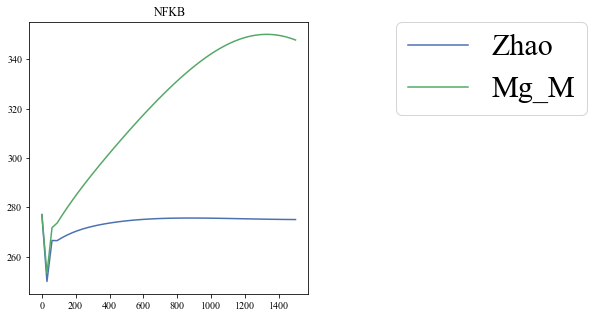

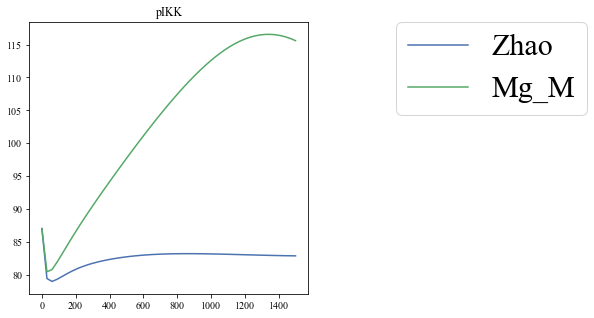

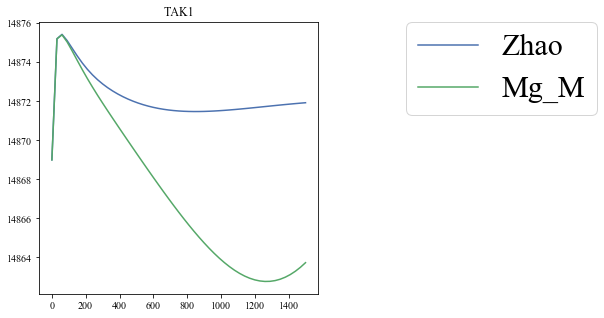

In [5]:
if True:
    import tellurium as te
    #** plotting vs Zhao
    #// update the Mg_M model by applying the inferred values
    model.reset(inferred_params_model)
    #// run the Mg_M model
#     targets = ['NFKB', 'pIKK', 'TAK1']
    from sample import targets, duration
    
    Mg_M_results = model.simulate(0,duration,selections=['TIME']+targets)
    #// run the original model 
    Zhao_2021 = te.loadSBMLModel("Zhao_2021.xml")
    Zhao_2021.reset()
    Zhao_results = Zhao_2021.simulate(0,duration,selections=['TIME']+targets)
    for target in targets:
        fig = plt.figure(figsize=(GSs.graph_size[0],GSs.graph_size[1]))
        fig.canvas.draw()
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(Zhao_results['time'],Zhao_results[target],label='Zhao')
        ax.plot(Mg_M_results['time'],Mg_M_results[target],label='Mg_M')
        ax.set_title(target)
        ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=0.,prop={ 'family':'Times New Roman','size':GSs.legend_font_size},ncol=1)
